# Conditional Probability Densities of AWGN Channel

* [Continuous Information Signal](#ContinuousInformationSignal)
* [Real Discrete Information Signal (BPSK)](#DiscreteInformationSignal)
* [Complex Discrete Information Signal (QPSK)](#ComplexInformationSignal)

Conditional probabilities or probability densities play an important role in statistical signal processing, machine learning and particularly in communications. This Jupyter-Notebook illustrates some fundamental statistical relationships.

## Continuous Information Signal <a class="anchor" id="ContinuousInformationSignal"></a>

A sensor measures a noisy observation of the information signal $x$. The noise is additive and white, the measured signal can be expressed by

\begin{equation}
  y = x + n \; .
\end{equation}

Usually the information signal and the noise are statistically independent of each other. In this case, the probability density of the measured signal $y$ is obtained from the convolution of the densities of $x$ and $n$.

\begin{equation}
  p_{\cal y}(\xi) = p_{\cal X}(\xi) \ast p_{\cal N}(\xi) 
\end{equation}

The likelihood function

\begin{equation}
  p_{{\cal Y} \mid {\cal X}=x}(y) = p_{\cal N}(y-x) 
  = \frac{p_{{\cal Y}, {\cal X}}(y,x)}{p_{\cal X}(x)}
\end{equation}

equals the probability density of the noise at position $y-x$. Please note that the likelihood function is often used to perform a maximum likelihood detection of $x$ and, therefore, it is a function of $x$. On the other hand, $p_{{\cal Y} \mid {\cal X}=x}(y)$ is a regular probability density function with respect to $y$ and the area below equals 1. Regarding the signal $x$, $p_{{\cal Y} \mid {\cal X}=x}(y)$ is no valid density because the integration versus $x$ does not deliver the value $1$. The likelihood function can be transformed by Bayes' rule into the die a posteriori probability density

\begin{equation}
  p_{{\cal X} \mid {\cal Y}=y}(x)
  = \frac{p_{{\cal X}, {\cal Y}}(x,y)}{p_{\cal Y}(y)}
  = p_{{\cal Y} \mid {\cal X}=x}(y) \cdot \frac{p_{\cal X}(x)}{p_{\cal Y}(y)} \; .
\end{equation}

For a zero-mean, Gaussian distributed information signal $x$, the a posteriori probability density is again a Gaussian distribution with the parameters

\begin{align}
  \mu_{{\cal X} \mid y} &= \frac{\gamma}{\gamma+1} \cdot y \\
  \sigma_{{\cal X} \mid y}^2 &= \frac{\sigma_{\cal X}^2}{\gamma+1} \; .
\end{align}


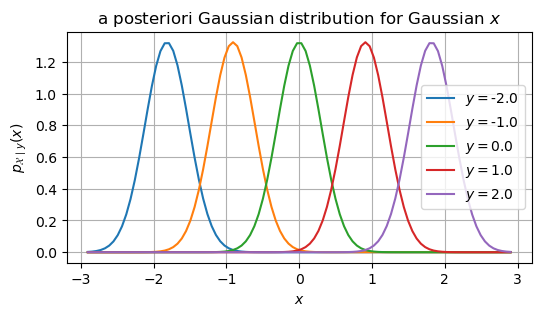

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# real gaussian distribution
# number of samples
N = 100
# variance
sigma2_N = 0.1

# variance of X
sigma2_X = 1.0
# received values
y = np.array((-2.0,-1.0,0.0,1.0,2.0))
# SNR
gamma = sigma2_X / sigma2_N
# conditional mean
mu_X_y = gamma / (gamma+1) * y
#conditional variance
sigma2_X_y = sigma2_X / (gamma+1)
# a posteriori densities
n_max = np.max(y) + 3.0*np.sqrt(sigma2_X_y)
n_real_app = np.linspace(-n_max,n_max,N)
X,Y = np.meshgrid(n_real_app,mu_X_y)
pdf_x_y = np.exp(-(X-Y)**2/2/sigma2_X_y) / np.sqrt(2. * np.pi * sigma2_X_y)


fig_app_gaussian = plt.figure(figsize=(6,3))
ax3 = fig_app_gaussian.add_subplot(111)
for run_y in np.arange(len(y)):
    ax3.plot(n_real_app, pdf_x_y[run_y,:],label='$y=$%.1f' %(y[run_y]))
plt.xlabel('$x$')
plt.ylabel('$p_{{\\cal X} \\mid y}(x)$')
plt.title('a posteriori Gaussian distribution for Gaussian $x$')
plt.grid(True)
plt.legend()
plt.show()

The above diagram shows that the conditional mean of $x$ given $y$ depends on the observation $y$. As a consequence, $y$ provides information about $x$, i.e. it indicates in which region $x$ lies with large probability. 

## Real Discrete Information Signal (BPSK) <a class="anchor" id="DiscreteInformationSignal"></a>

For a binary information signal taking the symbols $\mathbb{X}=\{-1,+1\}$ with probabilities $P_{-1}$ and $P_{+1}=1-P_{-1}$, the likelihood functions become

\begin{align}
  p_{{\cal Y} \mid x = \pm 1}(y) 
  &= \frac{1}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
      \cdot e^{- \frac{(y+\mp 1)^2}{2 \sigma_{\cal N}^2}} \; .
\end{align}

The probability density of the measured signal has the form

\begin{align}
  p_{\cal Y}(y) 
  &= P_{-1} \cdot p_{{\cal Y} \mid x=-1}(y) + P_{+1} \cdot p_{{\cal Y} \mid x=+1}(y) 
   = \frac{1-P_{+1}}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
      \cdot e^{- \frac{(y+1)^2}{2 \sigma_{\cal N}^2}}
   + \frac{P_{+1}}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
      \cdot e^{- \frac{(y-1)^2}{2 \sigma_{\cal N}^2}} \; .
\end{align}

For the considered binary alphabet $\mathbb{X}$, the a posteriori probabilities can be obtained by 

\begin{align}
  \Pr\{ {\cal X} = +1 \mid y \} 
  &= \frac{p_{{\cal Y} \mid x=+1}(y) \cdot P_{+1}}{p_{\cal Y}(y)} 
   = \frac{p_{{\cal Y} \mid x=+1}(y) \cdot P_{+1}}
          {(1-P_{+1}) \cdot p_{{\cal Y} \mid x=-1}(y) 
            + P_{+1} \cdot p_{{\cal Y} \mid x=+1}(y) } \\
  &= \frac{ 1 }{ 1 + \frac{1-P_{+1}}{P_{+1}} \cdot 
                \frac{ p_{{\cal Y} \mid x=-1}(y)}{p_{{\cal Y} \mid x=+1}(y)} } 
   = \frac{1}{1 + \frac{1-P_{+1}}{P_{+1}} \cdot e^{- 2y / \sigma_{\cal N}^2} }
  \\
  \Pr\{ {\cal X} = -1 \mid y \} 
  &= \frac{p_{{\cal Y} \mid x=-1}(y) \cdot P_{-1}}{p_{\cal Y}(y)} 
   = \frac{p_{{\cal Y} \mid x=-1}(y) \cdot (1 - P_{+1})}
          {(1-P_{+1}) \cdot p_{{\cal Y} \mid x=-1}(y) 
            + P_{+1} \cdot p_{{\cal Y} \mid x=+1}(y) } \\
  &= \frac{1}{1 + \frac{P_{+1}}{1-P_{+1}} \cdot 
      \frac{p_{{\cal Y} \mid x=+1}(y)}{p_{{\cal Y} \mid x=-1}(y)} } 
   = \frac{1}{1 + \frac{P_{+1}}{1-P_{+1}} \cdot e^{2y / \sigma_{\cal N}^2} } \; .
\end{align}

They are functions of the received signal $y$. Combining both expressions for $x=+1$ and $x=-1$ yields

\begin{equation}
  \Pr\{ {\cal X} = x \mid y \} 
  = \frac{1}{1 + \left(\frac{1-P_{+1}}{P_{+1}}\right)^x \cdot e^{- 2xy / \sigma_{\cal N}^2} } \; .
\end{equation}

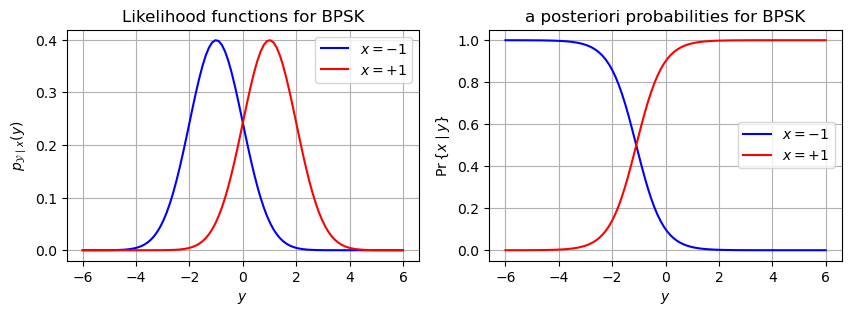

In [7]:
sigma2_N = 1
n_real = np.linspace(-1-5*np.sqrt(sigma2_N),1+5*np.sqrt(sigma2_N),N)

# Likelihood functions for BPSK
pdf_y_x = np.zeros((len(n_real),2))
pdf_y_x[:,0] = np.exp(-(n_real+1)**2/2/sigma2_N) / np.sqrt(2*np.pi*sigma2_N)
pdf_y_x[:,1] = np.exp(-(n_real-1)**2/2/sigma2_N) / np.sqrt(2*np.pi*sigma2_N)

# a priori probability for +1
P_1 = 0.9
# a posteriori probabilities as functions of y
pdf_x_y = np.zeros((len(n_real),2))
# x = -1
pdf_x_y[:,0] = 1.0 / ( 1.0 + P_1/(1-P_1)*np.exp(2*n_real/sigma2_N) )
# x = -1
pdf_x_y[:,1] = 1.0 / ( 1.0 + (1-P_1)/P_1*np.exp(-2*n_real/sigma2_N) )


fig_app_BPSK = plt.figure(figsize=(10,3))
plt.subplots_adjust(hspace=0.5)

ax4 = fig_app_BPSK.add_subplot(121)
ax4.plot(n_real, pdf_y_x[:,0], 'b-', label='$x=-1$')
ax4.plot(n_real, pdf_y_x[:,1], 'r-', label='$x=+1$')
plt.xlabel('$y$')
plt.ylabel('$p_{{\\cal Y} \\mid x}(y)$')
plt.title('Likelihood functions for BPSK')
plt.grid(True)
plt.legend()

ax4 = fig_app_BPSK.add_subplot(122)
ax4.plot(n_real, pdf_x_y[:,0], 'b-', label='$x=-1$')
ax4.plot(n_real, pdf_x_y[:,1], 'r-', label='$x=+1$')
plt.xlabel('$y$')
plt.ylabel('$\\Pr \\{x \\mid y \\}$')
plt.title('a posteriori probabilities for BPSK')
plt.grid(True)
plt.legend()

plt.show()

The first figure clearly illustrates that the likelihood functions equal the Gaussian distribution of the noise, shifted to the values of $x$. 

The second figure shows that the a posteriori probabilities for $x=+1$ tends to one with growing $y \to \infty$. Contrarily, $x=-1$ leads to the opposite behavior and the a posteriori probability approaches one for $y \to - \infty$. The a posteriori probabilities is the best measure to detect the information signal $x$ from the observation $y$.

\begin{equation}
    \hat{x} = \mathrm{argmax}_{\tilde{x}} \Pr \{ \tilde{x} \mid y \}
\end{equation}

The intersection of both curves in the figure above lies not at $y=0$ because the symbols $x = \pm 1$ are not uniformly distributed.

## Complex Discrete Information Signal (QPSK) <a class="anchor" id="ComplexInformationSignal"></a>

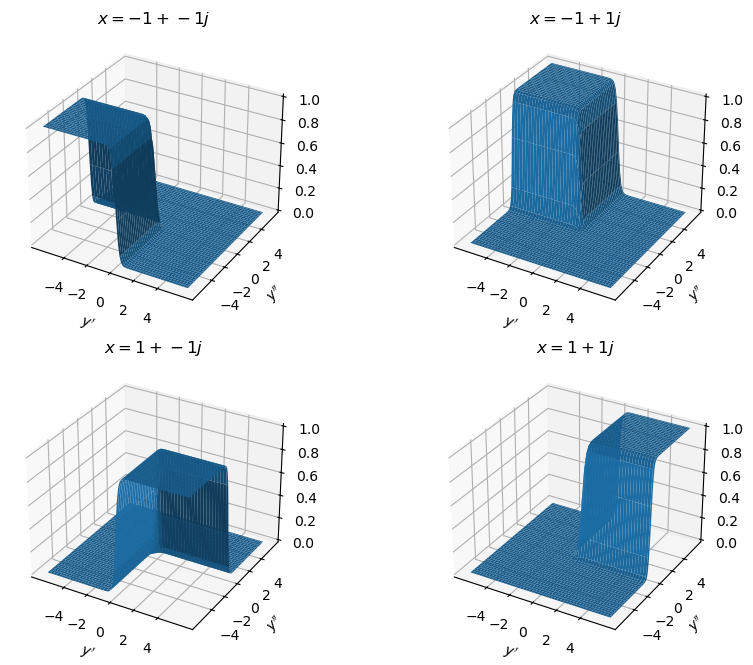

In [12]:
QPSK = ([-1-1j,-1+1j,1-1j,1+1j],[0.25,0.25,0.25,0.25])
sigma2_N = 0.5

nr,ni = np.meshgrid(n_real,n_real)
n_cmplx = (nr+1j*ni).flatten()
        
# determine p(y|x), p(y) and p(x|y)
pmf_y_x = np.zeros((len(n_cmplx),4))
pmf_x_y = np.zeros((len(n_cmplx),4))
pmf_y = np.zeros(len(n_cmplx))
cntrX = 0
for runx in QPSK[0]:
    tmp = np.exp(-np.abs(n_cmplx-runx)**2 / sigma2_N)
    pmf_y_x[:,cntrX] = tmp / np.sum(tmp)
    pmf_y += pmf_y_x[:,cntrX] * QPSK[1][cntrX]
    cntrX += 1

pmf_x_y = pmf_y_x * np.tile(QPSK[1],(len(n_cmplx),1)) / np.tile(pmf_y,(len(QPSK[0]),1)).transpose()

fig_app_QPSK = plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.15)

ax5 = fig_app_QPSK.add_subplot(221,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,0],(len(n_real),len(n_real))))
plt.xlabel('$y^\\prime$')
plt.ylabel('$y^{\\prime \\prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][0]),np.imag(QPSK[0][0])))
plt.xticks([-4,-2,0,2,4])
plt.yticks([-4,-2,0,2,4])
plt.grid(True)

ax5 = fig_app_QPSK.add_subplot(222,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,1],(len(n_real),len(n_real))))
plt.xlabel('$y^\\prime$')
plt.ylabel('$y^{\\prime \\prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][1]),np.imag(QPSK[0][1])))
plt.xticks([-4,-2,0,2,4])
plt.yticks([-4,-2,0,2,4])
plt.grid(True)

ax5 = fig_app_QPSK.add_subplot(223,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,2],(len(n_real),len(n_real))))
plt.xlabel('$y^\\prime$')
plt.ylabel('$y^{\\prime \\prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][2]),np.imag(QPSK[0][2])))
plt.xticks([-4,-2,0,2,4])
plt.yticks([-4,-2,0,2,4])
plt.grid(True)

ax5 = fig_app_QPSK.add_subplot(224,projection='3d')
ax5.plot_surface(nr, ni, np.reshape(pmf_x_y[:,3],(len(n_real),len(n_real))))
plt.xlabel('$y^\\prime$')
plt.ylabel('$y^{\\prime \\prime}$')
plt.title('$x=%g+%gj$' %(np.real(QPSK[0][3]),np.imag(QPSK[0][3])))
plt.xticks([-4,-2,0,2,4])
plt.yticks([-4,-2,0,2,4])
plt.grid(True)

plt.show()

The above graphs illustrate the the a posteriori probabilities allow the same interpretation in the complex case. The complex measured signal $y=y^\prime + j y^{\prime \prime}$ allows a reliable detection of the QPSK symbols $x$ if its magnitude is large. In this case, $y$ is far away from the origine and lies with high probability in the quadrant of the transmitted symbol $x$. In the vicinity of the origine, all four a posteriori probabilities are similar and a detection is very unreliable.